Is an EV affordable for a median income earning family household in the US?
          The affordability of an electric vehicle (EV) for a median income earning family household in the US depends on various factors, including the specific EV model, available incentives, and individual financial circumstances.

In [243]:
#Importing modules
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
from config import api_key
from pprint import pprint



1.Load Data

In [244]:
# Reading Electric Car Data from CSV File
Electric_car=pd.read_csv("../Electric car Data/ElectricCarData_Clean.csv")
Electric_car


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [245]:
#Full summary of the dataset
Electric_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [246]:
#Check missing value
Electric_car.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

2.Clean the data

In [247]:

# Converting Electric Car Price from Euros to Dollars and Renaming Column
dollar_conv=(Electric_car["PriceEuro"]*1.07).astype(int)
Electric_car["PriceEuro"]=dollar_conv
Electric_car.rename(columns={'PriceEuro':'Cost'},inplace=True)
Electric_car.head(10)


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Cost
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,59363
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,32100
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,60390
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,72802
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,35306
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,112350
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,34133
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,31759
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,49626
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,58850


array([[<Axes: title={'center': 'AccelSec'}>,
        <Axes: title={'center': 'TopSpeed_KmH'}>],
       [<Axes: title={'center': 'Range_Km'}>,
        <Axes: title={'center': 'Efficiency_WhKm'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Cost'}>]], dtype=object)

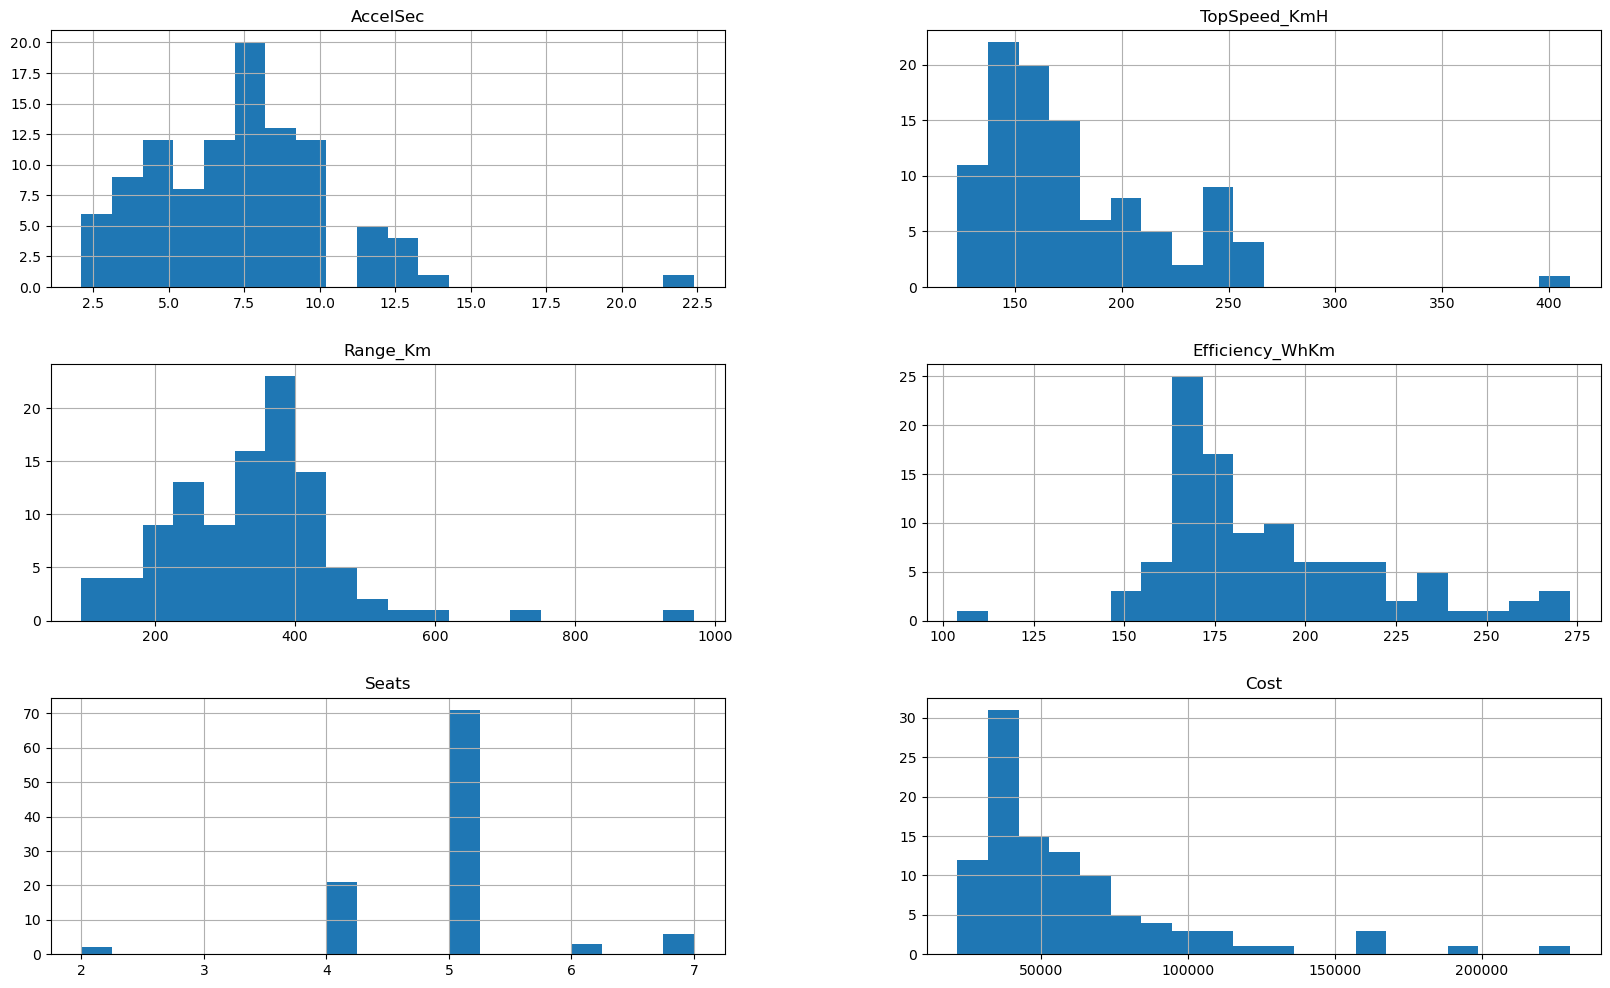

In [248]:
# Histogram of Electric Car Data

Electric_car.hist(figsize=(20,12),bins=20)


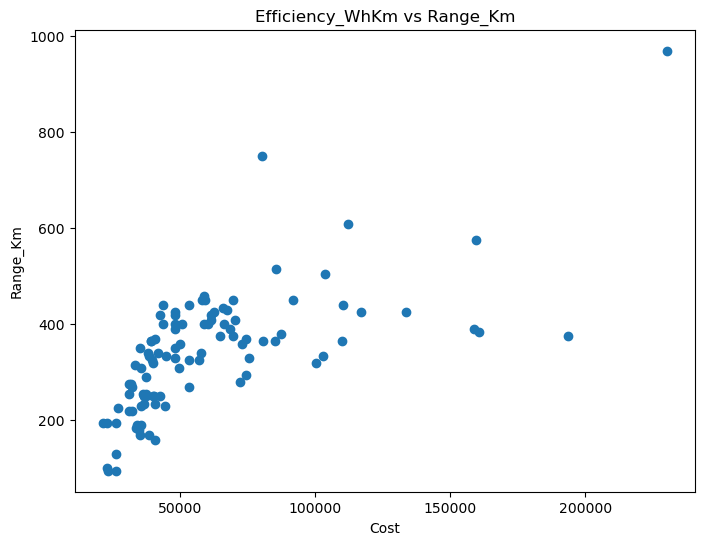

In [249]:
# Scatter Plot of Electric Car Cost vs Range

plt.figure(figsize=(8, 6))
plt.scatter(Electric_car['Cost'], Electric_car['Range_Km'])
plt.xlabel('Cost')
plt.ylabel('Range_Km')
plt.title('Efficiency_WhKm vs Range_Km')
plt.show()

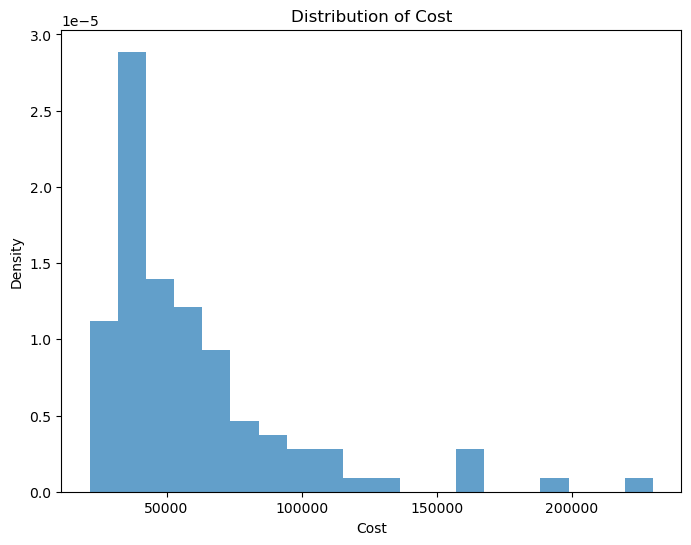

In [250]:
# Distribution of Electric Car Cost

plt.figure(figsize=(8, 6))
plt.hist(Electric_car['Cost'],bins=20, density=True, alpha=0.7)
plt.xlabel('Cost')
plt.ylabel('Density')
plt.title('Distribution of Cost')
plt.show()

In [251]:
# Count of Electric Car Brands

Electric_car_brand=Electric_car.Brand.value_counts(dropna=False)
Electric_car_brand

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

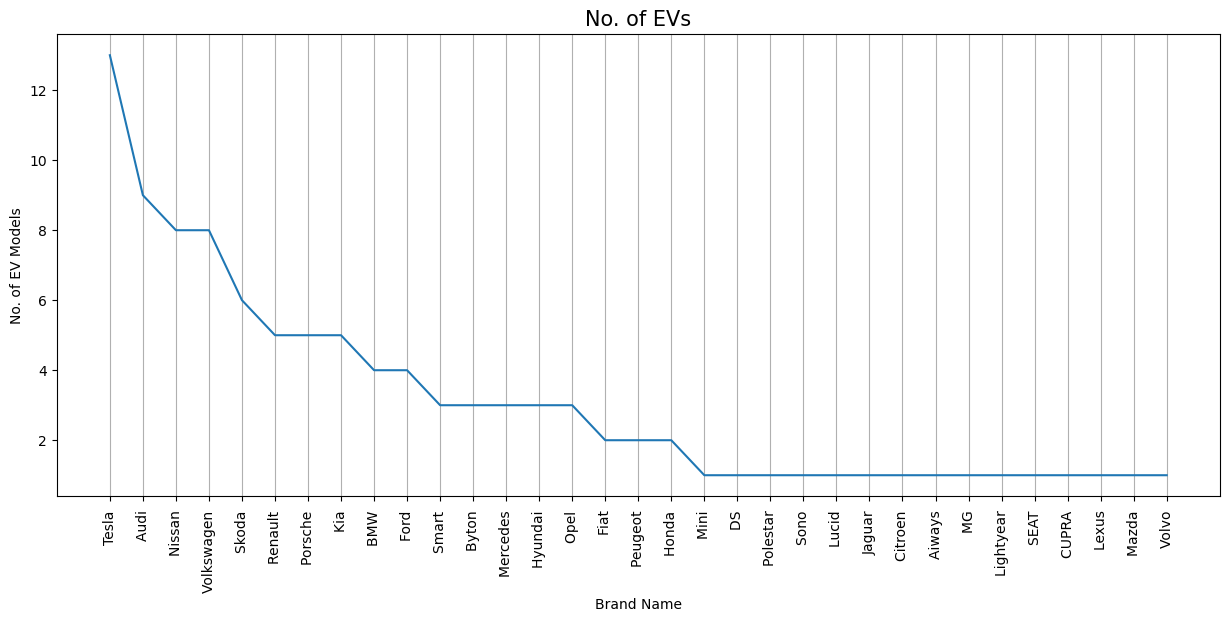

Brand with most number of vehicles


In [252]:
# Number of Electric Vehicle Models by Brand


plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.xlabel("Brand Name")
plt.ylabel("No. of EV Models")
plt.title('No. of EVs',fontsize=15)
plt.plot(Electric_car_brand, label='No. of Models')
plt.show()

print('Brand with most number of vehicles')


After gaining an initial understanding of electric vehicle options and their associated costs, we made the decision to conduct an analysis focusing on the median income of households throughout the country.

In [253]:
#Define path to file


us_median_income=pd.read_csv('../Electric car Data/kaggle_income.csv',encoding= 'ISO-8859-1')
us_median_income



,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649,13729,37977,1321.278082
32522,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
32523,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
32524,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000


In [254]:
# Selecting Columns from US Median Income DataFrame

us_median_income[["State_Name","County","City","Mean","Median"]]

,State_Name,County,City,Mean,Median
0,Alabama,Mobile County,Chickasaw,38773,30506
1,Alabama,Barbour County,Louisville,37725,19528
2,Alabama,Shelby County,Columbiana,54606,31930
3,Alabama,Mobile County,Satsuma,63919,52814
4,Alabama,Mobile County,Dauphin Island,77948,67225
...,...,...,...,...,...
32521,Puerto Rico,Adjuntas Municipio,Guaynabo,30649,13729
32522,Puerto Rico,Adjuntas Municipio,Aguada,15520,9923
32523,Puerto Rico,Adjuntas Municipio,Aguada,41933,34054
32524,Puerto Rico,Adjuntas Municipio,Aguada,0,0


In [255]:
# Calculating and Printing Median Salary

median_salary = us_median_income['Median'].median()
print("Median Salary:", median_salary)

Median Salary: 51874.5


In [256]:
# Assuming the median income for all cities
median_income = 51874.5
# Calculate affordability for 1 month (loan)
affordability_per_month = 0.20 * median_income / 12
# Calculate total affordability for 5 years
total_affordability_12_months = 12 * affordability_per_month

# Create a DataFrame to store the results
affordability_data = {
    'Metric': ['Affordability per month (loan)', 'Total affordability for 12 months'],
    'Amount': [affordability_per_month, total_affordability_12_months]
}

affordability_df = pd.DataFrame(affordability_data)

# Print the DataFrame
print(affordability_df)


                              Metric     Amount
0     Affordability per month (loan)    864.575
1  Total affordability for 12 months  10374.900


In [257]:
# Filtering and Sorting Top 10 Electric Cars by Range and Cost

Electric_car_top=Electric_car[["Brand","TopSpeed_KmH","Range_Km","Efficiency_WhKm","Cost"]].copy()
top_10_cars= Electric_car_top[(Electric_car_top['Cost'] < 51000)].sort_values(by=['Range_Km'], ascending=False)
top_10_cars.head(10)


,Brand,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Cost
15,Volkswagen,160,440,175,43801
37,CUPRA,160,425,181,48150
25,Volkswagen,160,420,183,48150
53,Skoda,160,420,183,42800
88,Skoda,180,400,193,50825
12,Hyundai,167,400,160,43650
71,Skoda,160,400,193,48150
86,Tesla,180,390,256,48150
31,Kia,167,370,173,40772
92,Kia,167,365,175,39415


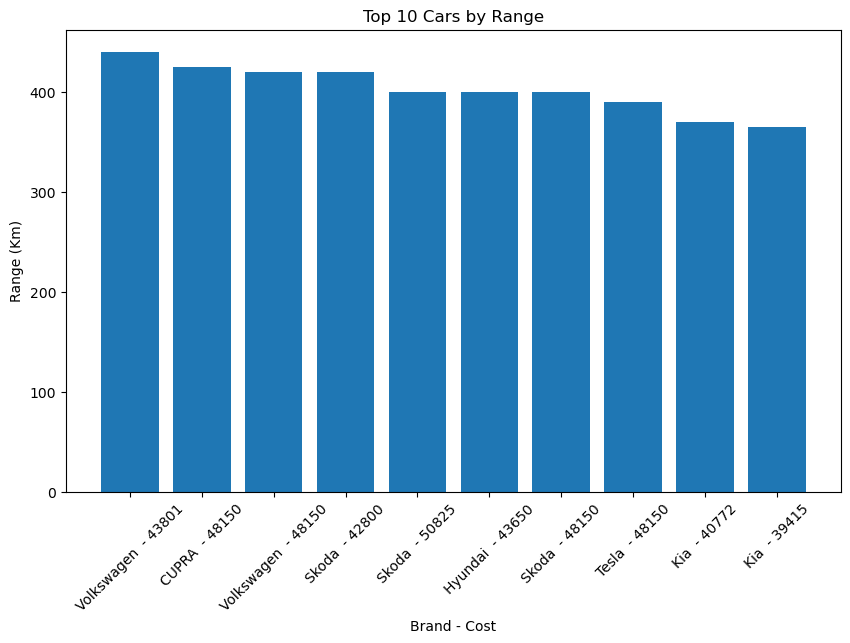

In [258]:

# Sort the DataFrame
Electric_car_sorted = Electric_car_top[(Electric_car_top['Cost'] < 51000)].sort_values(by=['Range_Km'], ascending=False)
top_10_cars = Electric_car_sorted.head(10)

# Bar Plot of Top 10 Electric Cars by Range

plt.figure(figsize=(10, 6))
plt.bar(top_10_cars['Brand'] + " - " + top_10_cars['Cost'].astype(str), top_10_cars['Range_Km'])
plt.xlabel('Brand - Cost')
plt.ylabel('Range (Km)')
plt.title('Top 10 Cars by Range')
plt.xticks(rotation=45)
plt.show()


In [259]:
# Filtering and Sorting Top 10 Electric Cars by Efficiency and Cost


Electric_car_sorted = Electric_car_top[(Electric_car_top['Cost'] < 51000)].sort_values(by=['Efficiency_WhKm'], ascending=False)
Electric_car_sorted.head(10)

,Brand,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Cost
86,Tesla,180,390,256,48150
66,Nissan,123,190,200,35573
68,Renault,130,160,194,40660
83,Ford,180,360,194,50183
71,Skoda,160,400,193,48150
18,MG,140,220,193,32100
88,Skoda,180,400,193,50825
98,Nissan,160,330,191,48150
49,Aiways,150,335,188,38580
25,Volkswagen,160,420,183,48150


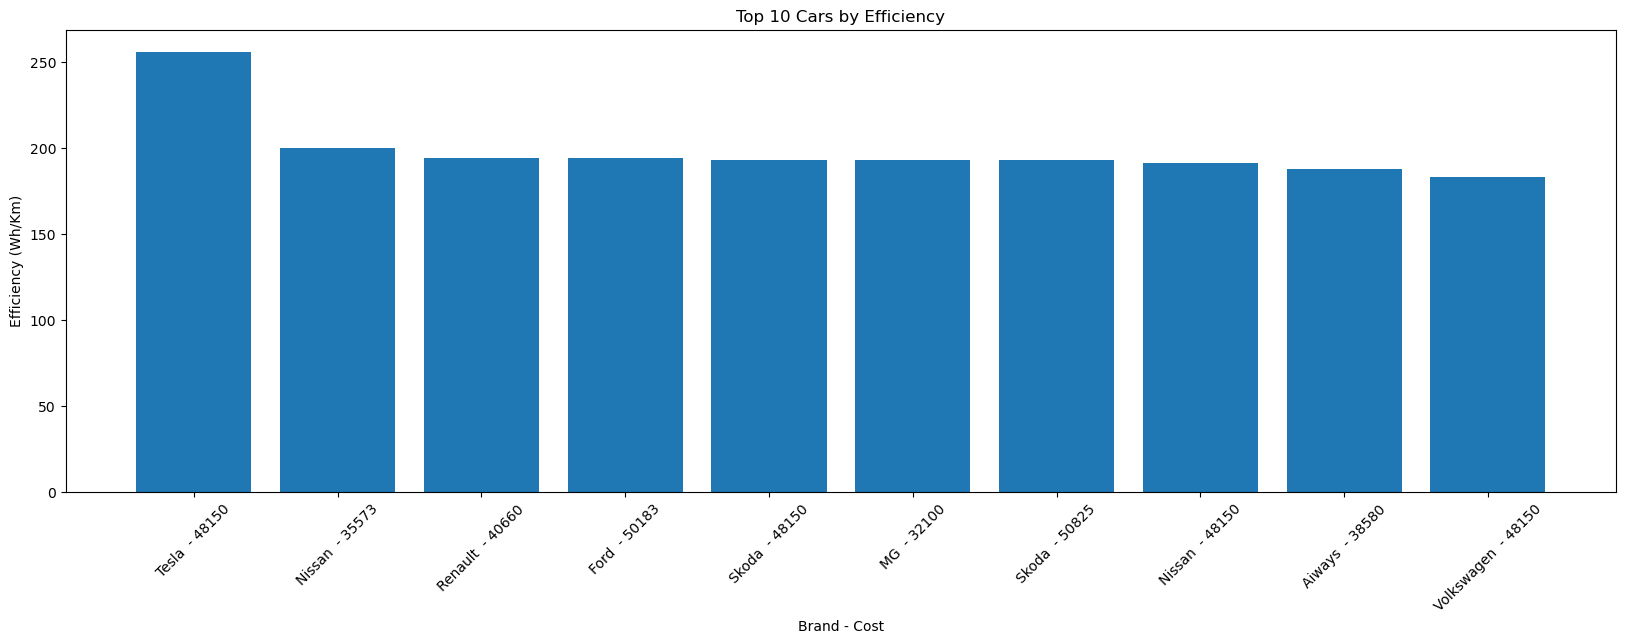

In [260]:

# Sort the DataFrame
Electric_car_sorted = Electric_car_top[(Electric_car_top['Cost'] < 51000)].sort_values(by=['Efficiency_WhKm'], ascending=False)
top_10_cars = Electric_car_sorted.head(10)

# Create the bar plot
plt.figure(figsize=(20, 6))
plt.bar(top_10_cars['Brand'] + " - " + top_10_cars['Cost'].astype(str), top_10_cars['Efficiency_WhKm'])
plt.xlabel('Brand - Cost')
plt.ylabel('Efficiency (Wh/Km)')
plt.title('Top 10 Cars by Efficiency')
plt.xticks(rotation=45)
plt.show()

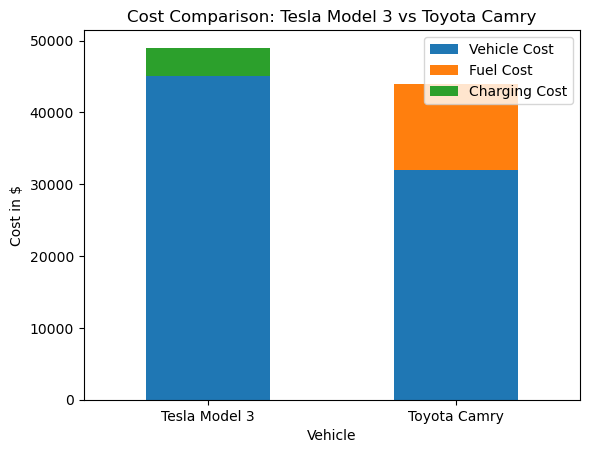

<Figure size 640x480 with 0 Axes>

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
vehicle = ['Tesla Model 3', 'Toyota Camry']
vehicle_cost = [45000, 32000]
fuel_cost = [0, 12000]
charging_cost = [4000, 0]
total_cost = [sum(x) for x in zip(vehicle_cost, fuel_cost, charging_cost)]

# Create DataFrame
df = pd.DataFrame({'Vehicle': vehicle, 'Vehicle Cost': vehicle_cost,
                   'Fuel Cost': fuel_cost, 'Charging Cost': charging_cost,
                   'Total Cost': total_cost})

# Plotting
df.set_index('Vehicle', inplace=True)
df[['Vehicle Cost', 'Fuel Cost', 'Charging Cost']].plot(kind='bar', stacked=True)

# Formatting
plt.title('Cost Comparison: Tesla Model 3 vs Toyota Camry')
plt.ylabel('Cost in $')
plt.xlabel('Vehicle')
plt.xticks(rotation=0)
plt.legend()

# Display the graph
plt.show()
plt.savefig('cost_comparison_graph.png')

The affordability of an electric vehicle (EV) for a median income earning family household in the US depends on various factors, including the specific EV model, available incentives, and individual financial circumstances.

EVs generally have a higher upfront cost compared to traditional gasoline-powered vehicles. However, they offer long-term cost savings through lower fuel and maintenance expenses. In addition, there are often federal and state incentives, tax credits, and rebates available for purchasing EVs, which can help offset the initial cost.

The affordability of an EV for a median income family also depends on their monthly budget, including factors such as housing, transportation, and other living expenses. It's essential to consider the total cost of ownership, including not just the purchase price, but also charging infrastructure, insurance, and any additional expenses related to EV ownership.

In recent years, the prices of EVs have been decreasing, and more affordable options are becoming available in the market. As technology advances and economies of scale improve, it is expected that EVs will become increasingly accessible for median income earning family households in the US.

